In [1]:
def verify_list_mensages(dataframe):
    """
        This function is to get probabilities if spam your boolean value
        
        @param dataframe - Series dataframe for extract mensages
        
        @return ifs_spam - boolean values if spam ou not
        @return probs_spam - probabilities if spam or not
    """
    
    ifs_spam = []
    probs_spam = []
    
    for mensage in dataframe:
        ifs_spam.append(spam_detect.is_spam(mensage))
        probs_spam.append(spam_detect.prob_spam(mensage))
    
    return ifs_spam, probs_spam

<div style='border-top:5px solid green;'></div>

# 0. Install packages needed

If wont run pip install before you cant execute cell bellow.

In [2]:
# !pip install -r ../requeriments.txt

<div style='border-top:5px solid green;'></div>

# 1. Imports needed

In this section you can see just the libary need for this notebook.

In [3]:
import pickle                                           # Upload model pre-trained
import warnings                                         # Ignores warnings

import pandas as pd                                     # Upload datasets
import numpy as np                                      # For calculate and transform datasets
import seaborn as sns                                   # Visualize results in graph more complex
import matplotlib.pyplot as plt                         # Visualize results in graph

from sklearn.metrics import confusion_matrix            # Get model cmfs
from sklearn.metrics import accuracy_score              # Get model accuracy's
from sklearn.metrics import classification_report       # Get better model repors

from classes.SpamDetector import SpamDetector           # Classed proposed by challenge

# Ignore warnings
warnings.filterwarnings("ignore")

<div style='border-top:5px solid green;'></div>

#  2. Uploads

This dataset were provided for the challenge, in this section have just visualize the shape and first lines.

In [4]:
# 2.1 Upload pre-trained model
sms_model = pickle.load(open("../model/sms_model_v1.pkl", "rb"))

# 2.2 Uploads datasets

# 2.3.1 Train
df_train = pd.read_csv('../data/TrainingSet/sms-hamspam-train.csv',  sep="\t", names=['type','mensage'])
print('='*50 + f'\n Train dataset {df_train.shape[0]} samples and {df_train.shape[1]} columns')
display(df_train.head())

# 2.3.2 Validation
df_val = pd.read_csv('../data/TrainingSet/sms-hamspam-val.csv',  sep="\t", names=['type','mensage'])
print('='*50 + f'\n Vaidation dataset {df_val.shape[0]} samples and {df_val.shape[1]} columns')
display(df_val.head())

#2.3.3 Test
df_test = pd.read_csv('../data/TestSet/sms-hamspam-test.csv',  sep="\t", names=['mensage'])
print('='*50 + f'\n Test dataset {df_test.shape[0]} samples and {df_test.shape[1]} columns \n')
display(df_test.head())

 Train dataset 3780 samples and 2 columns


,type,mensage
0,ham,Webpage s not available!
1,ham,Sorry about that this is my mates phone and i ...
2,ham,Good night my dear.. Sleepwell&amp;Take care
3,spam,Sunshine Hols. To claim ur med holiday send a ...
4,ham,If you're thinking of lifting me one then no.


 Vaidation dataset 945 samples and 2 columns


,type,mensage
0,ham,How do friends help us in problems? They give ...
1,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
2,spam,Free entry in 2 a weekly comp for a chance to ...
3,ham,We can make a baby in yo tho
4,ham,Just haven't decided where yet eh ?


 Test dataset 847 samples and 1 columns 



,mensage
0,I know that my friend already told that.
1,It took Mr owl 3 licks
2,Dunno y u ask me.
3,K.k:)advance happy pongal.
4,I know but you need to get hotel now. I just g...


We can see that the test dataset doesn't have type message columns, so we analyze the pre-trained if he good.

<div style='border-top:5px solid green;'></div>

# 4. Model Analysis

First we see the model archtecture

In [5]:
sms_model

Pipeline(steps=[('transformer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('rf', RandomForestClassifier())])

Doesn't have just a model but a tokenization and vectorization pipeline.

In [6]:
# Instantiate SpamDetector class
spam_detect = SpamDetector(sms_model)
spam_detect

The object class has instatiate!

# 4.1 Metrics Results

In [7]:
# Get boolean and probabilities values each mensangem in dataframe
ifs_spam, probs_spam =  verify_list_mensages(df_val['mensage'])

# Map for counts number of ham and spam
qt_ham, qt_spam = pd.DataFrame(list(map(int,ifs_spam))).value_counts().values

# Get predict values and true values
y_pred = list(map(lambda x: 'spam' if x == 1 else 'ham', ifs_spam))
y_true = df_val['type'].values

# 4.1.2 Plot confusion matrix and classsification report

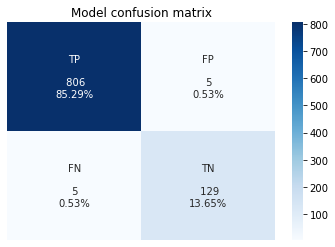

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       811
        Spam       0.96      0.96      0.96       134

    accuracy                           0.99       945
   macro avg       0.98      0.98      0.98       945
weighted avg       0.99      0.99      0.99       945



In [8]:
# Get array of confusion matrixx
cmf_matrix = confusion_matrix(y_pred,y_true)

# Fllaten confusion matrix results and percentagens
group_counts = ["{0:0.0f}".format(value) for value in cmf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmf_matrix.flatten()/np.sum(cmf_matrix)]

# Reshape to 2x2 and add title to plot
labels = [f"{Nome}\n\n {v1}\n{v2}" for Nome, v1, v2 in zip(['TP','FP','FN','TN'], group_counts, group_percentages)]
labels = np.array(labels).reshape(2,2)

# Plot the heatmap and subptitle
plt.title('Model confusion matrix')
sns.heatmap(cmf_matrix,annot=labels,fmt='', cmap='Blues')
plt.axis('off')
plt.show()

# Print accuracy, recall, and precision about this spam model
print(classification_report(y_true, y_pred, target_names=['Ham', 'Spam']))

This model has good metrics, because just not accuracy is high, and recall and precision are very close. The importance of recall and precision are close is the fact model not biased for a specific class, for example, if the model has 90% recall and 80% precision then classify more ham messages with spam, it's mean more false alarms.


# 4.1.3 Plot model probabilities

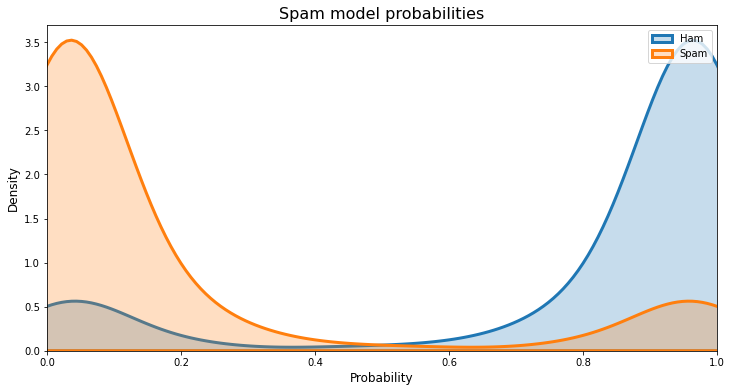

In [9]:
# Get probabilities in array that contain [prob if ham, prob if spam]
probs_model = list(map(lambda x: list(x), sms_model.predict_proba(df_val['mensage'].values)))

# Divide in two columns value for atribute each one in variable
df_temp = pd.DataFrame(probs_model, columns=['ham','spam'])
ham_probs = df_temp['ham']
spam_probs = df_temp['spam']

# Plot results
fig, ax = plt.subplots(1, figsize=(12,6))

ax.set_xlim(0)
ax.set_title("Spam model probabilities", fontsize = 16)
ax.set_xlabel("Probability", fontsize = 12)
ax.set_ylabel("Density", fontsize = 12)

sns.distplot(ham_probs.values,
             hist = False,
             kde  = True,
             label = 'Ham',
             kde_kws = {'shade': True, 'linewidth': 3}, ax = ax)

sns.distplot(spam_probs.values,
             hist = False,
             kde  = True,
             label = 'Spam',
             kde_kws = {'shade': True, 'linewidth': 3}, ax = ax)

plt.legend(loc = 'best')
plt.show()

This graph shows that the model has very sure in the classification, in the x-axis is a probability for a sample and the density probabilities. When both curves are close to zero or one means that a good model, because the model has sure in your prediction.

# 4.1.4 Plot outputs model

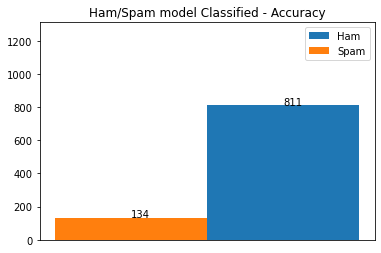

In [10]:
plt.title(f'Ham/Spam model Classified - Accuracy')
plt.bar(1, height = qt_ham, width=1, label='Ham')
plt.bar(0, height = qt_spam, width=1, label='Spam')

plt.text(1, qt_ham+2, str(qt_ham), color='black')
plt.text(0, qt_spam+2, str(qt_spam), color='black')

plt.ylim(top =qt_ham+500)

plt.xticks([])
plt.legend(loc='best')
plt.show()

This graph show the quantity of ham and spam mensage, indeed in test dataset have more ham then spam mensages.

<div style='border-top:5px solid green;'></div>

# 5. Model outputs from test dataset and your probabilities

In [11]:
# Get boolean and probabilities values each mensangem in dataframe
ifs_spam, probs_spam =  verify_list_mensages(df_test['mensage'])
qt_ham, qt_spam = pd.DataFrame(list(map(int,ifs_spam))).value_counts().values

# Map for counts number of ham and spam
y_pred = list(map(lambda x: 'spam' if x == 1 else 'ham', ifs_spam))
y_true = df_val['type'].values

In [12]:
# Get probabilities in array that contain [prob if ham, prob if spam]
probs_model = list(map(lambda x: list(x), sms_model.predict_proba(df_test['mensage'].values)))

# Divide in two columns value for atribute each one in variable
df_temp = pd.DataFrame(probs_model, columns=['ham','spam'])
ham_probs = df_temp['ham']
spam_probs = df_temp['spam']

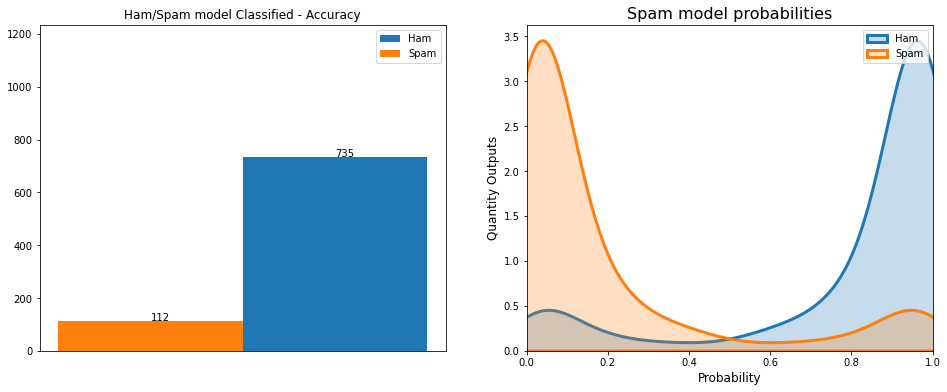

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6))

ax1.set_title(f'Ham/Spam model Classified - Accuracy')
ax1.bar(1, height = qt_ham, width=1, label='Ham')
ax1.bar(0, height = qt_spam, width=1, label='Spam')


ax1.text(1, qt_ham+2, str(qt_ham), color='black')
ax1.text(0, qt_spam+2, str(qt_spam), color='black')

ax1.axis(ymax =qt_ham+500)

ax1.set_xticks([])
ax1.legend(loc='best')

ax2.set_xlim(0)
ax2.set_title("Spam model probabilities", fontsize = 16)
ax2.set_xlabel("Probability", fontsize = 12)
ax2.set_ylabel("Quantity Outputs", fontsize = 12)

fig.add_subplot(sns.distplot(ham_probs.values,
             hist = False,
             kde  = True,
             label = 'Ham',
             kde_kws = {'shade': True, 'linewidth': 3}, ax = ax2))

fig.add_subplot(sns.distplot(spam_probs.values,
             hist = False,
             kde  = True,
             label = 'Spam',
             kde_kws = {'shade': True, 'linewidth': 3}, ax = ax2))

ax2.legend(loc = 'best')
plt.show()

Even though I don't have the actual labels of each message, according to the analysis done in the previous session, I believe that the model correctly classified the messages in the given test dataset.

<div style='color:red;'>**Conclusion**: The model is very good, and doesn't need sample preprocessing!</div>